# Phishing Email Detection Using Machine Learning

## Problem Statement

Spam and phishing emails pose a significant cybersecurity threat by enabling fraud, credential theft, and malware distribution. In this project, the dataset consists of unstructured email text data. The objective is to build and evaluate machine-learning models that can automatically classify emails as spam (malicious) or legitimate (ham), using appropriate feature extraction and evaluation metrics.

## About the dataset

The dataset used in this project is SpamAssassin Public Corpus, a widely used dataset for detecting ham and spam. This contains folder namely easy_ham (legitimate), hard_ham (closely resemble spam) and spam_2 (spam). This dataset is real world email messages collected for the purpose of training and evaluating spam filtering systems. For this project, emails from the easy_ham and hard_ham folders were labeled as ham (0), while emails from the spam_2 folder were labeled as spam (1). Due to the unstructured nature of the data, natural language processing techniques were applied to transform the raw email text into numerical features suitable for machine-learning models.

## Install and import required libraries

In [1]:
!pip install numpy pandas scikit-learn nltk matplotlib seaborn

In [66]:
# Core libraries
import numpy as np
import pandas as pd
import os
import re

# NLP and text processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
    
)

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [75]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Legitimate', 'Phishing']); ax.yaxis.set_ticklabels(['Legitimate', 'Phishing']) 
    plt.show() 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SUGANYA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

## Extract emails from folders

In [35]:


def extract_emails(folder_path):
    emails = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)

        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='latin-1') as file:
                emails.append(file.read())

    return emails

In [37]:
easy_ham_path = r"C:\Users\SUGANYA\Downloads\archive\easy_ham"
hard_ham_path = r"C:\Users\SUGANYA\Downloads\archive\hard_ham"
spam_path     = r"C:\Users\SUGANYA\Downloads\archive\spam_2"
easy_ham_emails = extract_emails(easy_ham_path)
hard_ham_emails = extract_emails(hard_ham_path)
spam_emails = extract_emails(spam_path)

In [38]:
len(easy_ham_emails), len(hard_ham_emails), len(spam_emails)

(2551, 250, 1397)

## Dataframe

In [39]:
data = (
    [{'email_text': text, 'label': 0} for text in easy_ham_emails] +
    [{'email_text': text, 'label': 0} for text in hard_ham_emails] +
    [{'email_text': text, 'label': 1} for text in spam_emails]
)

df = pd.DataFrame(data)

In [40]:
df.head()

,email_text,label
0,From exmh-workers-admin@redhat.com Thu Aug 22...,0
1,From Steve_Burt@cursor-system.com Thu Aug 22 ...,0
2,From timc@2ubh.com Thu Aug 22 13:52:59 2002\n...,0
3,From irregulars-admin@tb.tf Thu Aug 22 14:23:...,0
4,From exmh-users-admin@redhat.com Thu Aug 22 1...,0


In [41]:
df['label'].value_counts()

label
0    2801
1    1397
Name: count, dtype: int64

## Text Preprocessing

In [42]:

def clean_text(text):
    text = text.lower()                      # lowercase
    text = re.sub(r'[^a-z\s]', ' ', text)    # remove punctuation & numbers
    text = re.sub(r'\s+', ' ', text).strip() # remove extra spaces
    return text


In [43]:
df['clean_text'] = df['email_text'].apply(clean_text)


In [44]:
df[['email_text', 'clean_text']].head(3)


,email_text,clean_text
0,From exmh-workers-admin@redhat.com Thu Aug 22...,from exmh workers admin redhat com thu aug ret...
1,From Steve_Burt@cursor-system.com Thu Aug 22 ...,from steve burt cursor system com thu aug retu...
2,From timc@2ubh.com Thu Aug 22 13:52:59 2002\n...,from timc ubh com thu aug return path timc ubh...


In [45]:
tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words='english'
)


In [46]:
X = tfidf.fit_transform(df['clean_text'])
y = df['label']


In [47]:
X.shape

(4198, 5000)

In [48]:
len(tfidf.get_feature_names_out())


5000

In [50]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 659124 stored elements and shape (4198, 5000)>

## Naive Bayes

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [52]:
X_train.shape, X_test.shape

((3358, 5000), (840, 5000))

In [55]:
#y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

label
0    0.666667
1    0.333333
Name: proportion, dtype: float64

In [56]:
nb_model=MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [77]:
y_pred=nb_model.predict(X_test)

### Confusion matrix and Classification report

In [58]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[518  42]
 [ 19 261]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       560
           1       0.86      0.93      0.90       280

    accuracy                           0.93       840
   macro avg       0.91      0.93      0.92       840
weighted avg       0.93      0.93      0.93       840



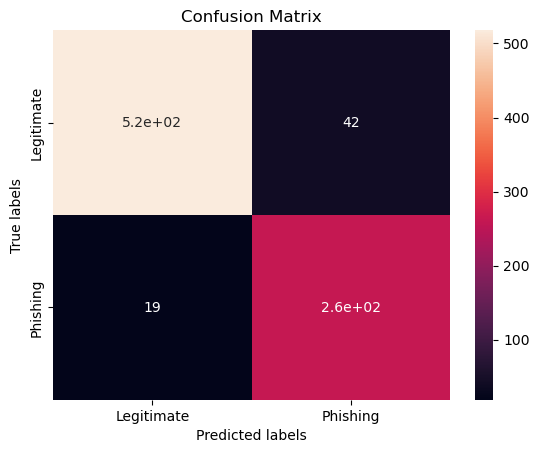

In [76]:
plot_confusion_matrix(y_test, y_pred)

## Logistic Regression

In [68]:
lr=LogisticRegression(max_iter=1000,
    class_weight='balanced',
    random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [69]:
y_pred_lr=lr.predict(X_test)

In [70]:
y_prob_lr=lr.predict_proba(X_test)[:,1]

In [71]:
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
#print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

[[544  16]
 [  8 272]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       560
           1       0.94      0.97      0.96       280

    accuracy                           0.97       840
   macro avg       0.96      0.97      0.97       840
weighted avg       0.97      0.97      0.97       840



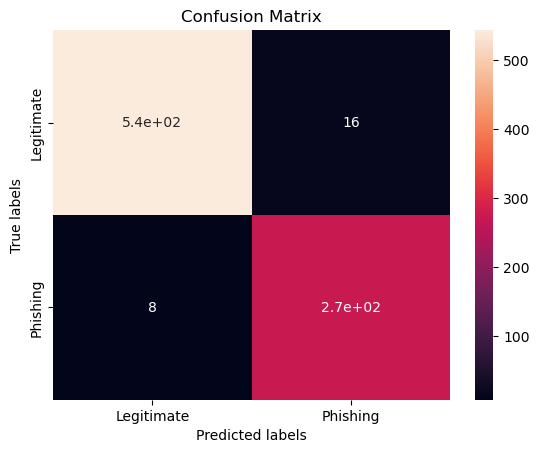

In [78]:
plot_confusion_matrix(y_test, y_pred_lr)

## Linear SVM

In [72]:
svm_model = LinearSVC(
    class_weight='balanced',
    random_state=42
)
svm_model.fit(X_train, y_train)


LinearSVC(class_weight='balanced', random_state=42)

In [73]:
y_pred_svm = svm_model.predict(X_test)


In [74]:
print(confusion_matrix(y_test, y_pred_svm))

print(classification_report(y_test, y_pred_svm))

[[552   8]
 [  3 277]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       560
           1       0.97      0.99      0.98       280

    accuracy                           0.99       840
   macro avg       0.98      0.99      0.99       840
weighted avg       0.99      0.99      0.99       840



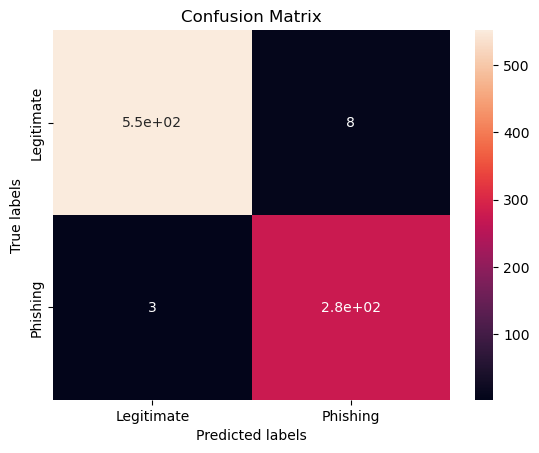

In [79]:
plot_confusion_matrix(y_test, y_pred_svm)

Among the evaluated models, Linear SVM achieved the highest spam recall, missing only 3 phishing emails. Since false negatives pose the highest security risk, SVM was selected as the final model for deployment.